<a href="https://colab.research.google.com/github/iashyam/Machine-Learning-First-Repo/blob/main/Hand%20Written%20Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
# prompt: import test_train_split from sklearn in python

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow
# import test_train_split from sklearn
import plotly.express as px

# Handwritten Digits Recognitiaon using Neural Network

Handwritten digits recognition problem is a standard classification problem in Machine Learning.

In [176]:
train_data = pd.read_csv("train.csv")

y_train = train_data["label"]
x_train = train_data.drop("label", axis=1)

In [177]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


### Preprocessing the visualizing the data

In [178]:
# splitting into train and validation test sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, shuffle=True)
# first we normalize the data

def pre_process(data:pd.DataFrame) -> pd.DataFrame:
    '''
    This function is used to normalize the data.

    Args:
        data (pd.DataFrame): Data to be normalized.

    Returns:
        pd.DataFrame: Normalized data.
    '''
    data = data / 255
    return data

x_train = pre_process(x_train)
x_val = pre_process(x_val)

y_train = pd.get_dummies(y_train)
y_val = pd.get_dummies(y_val)

In [179]:
def show_image(data:pd.DataFrame, location:int):
    plt.imshow(data.iloc[location].values.reshape(28, 28), cmap="gray")
    plt.show()

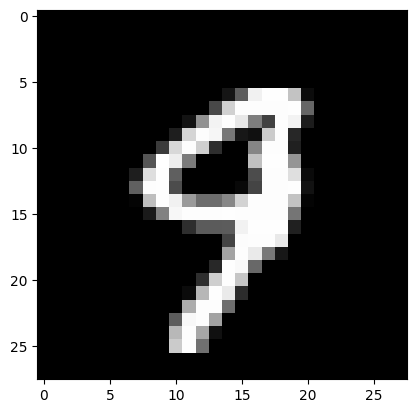

9


In [180]:
location = np.random.randint(0, len(x_train))
show_image(x_train, location)
print(np.argmax(y_train.iloc[location]))

In [204]:
# visualising the label distribution with a bar chart using plotly
fig = px.bar(x=y_train.columns, y=y_train.sum())
fig.update_layout(xaxis_title="Label", yaxis_title="Count")
fig.show()

In [181]:
# now we start data preprocessing
features_no = 50

# # # do PCA for dimenssionality reduction
pca = PCA(n_components=features_no)
x_train_pca = pd.DataFrame(pca.fit_transform(x_train))
x_val_pca = pd.DataFrame(pca.transform(x_val))

In [182]:
def make_batches(batch_size:int, data:pd.DataFrame, labels:pd.Series):
    batches = []
    for i in range(0, len(data), batch_size):
        batches.append((data.iloc[i:i+batch_size], labels.iloc[i:i+batch_size]))
    return batches

In [183]:
def make_model(n_input:int, hidden_layers:list, n_output:int):
    model = Sequential()
    model.add(Input(shape=(n_input,)))
    for n_units in hidden_layers:
        model.add(Dense(n_units, activation="relu"))
    model.add(Dense(n_output, activation="softmax"))
    return model

In [187]:
hidden_layers = [32,32,32]
model = make_model(n_input=features_no, hidden_layers=hidden_layers, n_output=10)
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [188]:
history = model.fit(x_train_pca, y_train, batch_size=50, epochs=20, verbose=1)


Epoch 1/20
672/672 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6417 - loss: 1.1625
Epoch 2/20
672/672 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9228 - loss: 0.2558
Epoch 3/20
672/672 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9422 - loss: 0.1959
Epoch 4/20
672/672 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9531 - loss: 0.1563
Epoch 5/20
672/672 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9588 - loss: 0.1400
Epoch 6/20
672/672 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9632 - loss: 0.1259
Epoch 7/20
672/672 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - loss: 0.1152
Epoch 8/20
672/672 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9691 - loss: 0.1008
Epoch 9/20
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9701 - loss: 0.0961
Epoch 10/20
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9725 - loss: 0.0941
Epoch 11/20
672/672 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9729 - loss: 0.0845
Epoch 12/20
672/672 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [200]:
histor_val = model.fit(x_val_pca, y_val, batch_size=50, epochs=20)

Epoch 1/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9604 - loss: 0.1431
Epoch 2/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9705 - loss: 0.0906
Epoch 3/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9754 - loss: 0.0825
Epoch 4/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9824 - loss: 0.0610
Epoch 5/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9821 - loss: 0.0555
Epoch 6/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9891 - loss: 0.0438
Epoch 7/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9909 - loss: 0.0374
Epoch 8/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9919 - loss: 0.0329
Epoch 9/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9955 - loss: 0.0254
Epoch 10/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9952 - loss: 0.0252
Epoch 11/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9952 - loss: 0.0225
Epoch 12/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

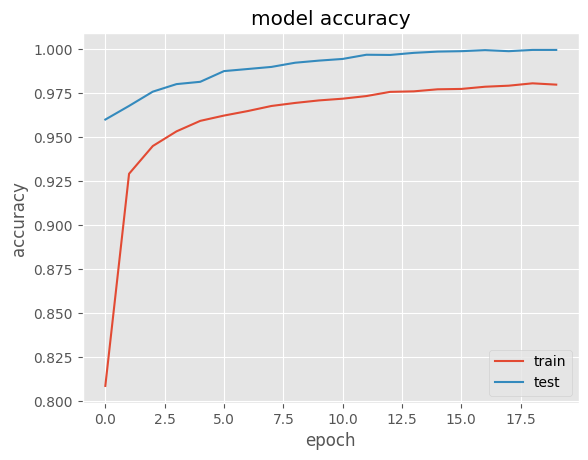

In [206]:
plt.style.use("ggplot")
plt.plot(history.history['accuracy'])
plt.plot(histor_val.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6


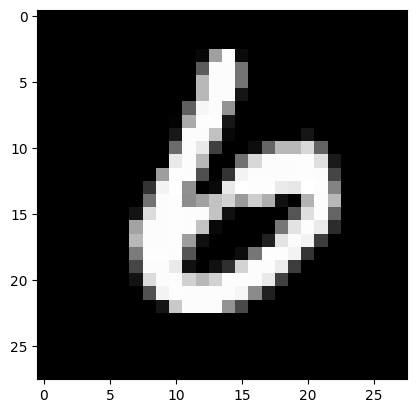

In [102]:
x = np.random.randint(0, len(x_val))
prediction=np.argmax(model.predict(x_val.iloc[x:x+1]))
print(prediction)
show_image(x_val, x)

In [103]:
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21909575164318085
Test accuracy: 0.9346428513526917


In [163]:
def fine_tuning(features:int=50, hidden_layers:int=3, hidden_units:int=32, batch_size:int=50, epochs:int=20) ->float:
    '''
    This Fucntion is used to fine tune the hyperparameters of the model.

    Args:
        features (int, optional): Number of features to be used for the model. Defaults to 50.
        hidden_layers (int, optional): Number of hidden layers to be used in the model. Defaults to 3.
        hidden_units (int, optional): Number of hidden units to be used in each hidden layer. Defaults to 32.
        batch_size (int, optional): Batch size to be used for the model. Defaults to 50.
        epochs (int, optional): Number of epochs to be used for the model. Defaults to 20.

    Returns:
        float: Accuracy of the model.

    Example
    >>> fine_tuning(features=50, hidden_layers=3, hidden_units=32, batch_size=50, epochs=20)


    '''
    # # # do PCA for dimenssionality reduction
    pca = PCA(n_components=features)
    x_train_pca = pd.DataFrame(pca.fit_transform(x_train))
    x_val_pca = pd.DataFrame(pca.transform(x_val))

    hidden_layers = [hidden_units]*hidden_layers

    model = make_model(n_input=features, hidden_layers=hidden_layers, n_output=10)
    model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
    model.fit(x_train_pca, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

    score = model.evaluate(x_val_pca, y_val, verbose=0)
    return score[1]

In [164]:
possible_features = [5,10,15,50,100]
for features in possible_features:
    print(f"Features: {features}, Accuracy: {fine_tuning(features)}")

Features: 5, Accuracy: 0.7575892806053162
Features: 10, Accuracy: 0.9241071343421936
Features: 15, Accuracy: 0.9444940686225891
Features: 50, Accuracy: 0.9601190686225891
Features: 100, Accuracy: 0.9540178775787354


## Visualizing the data using a confusion Matrix

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


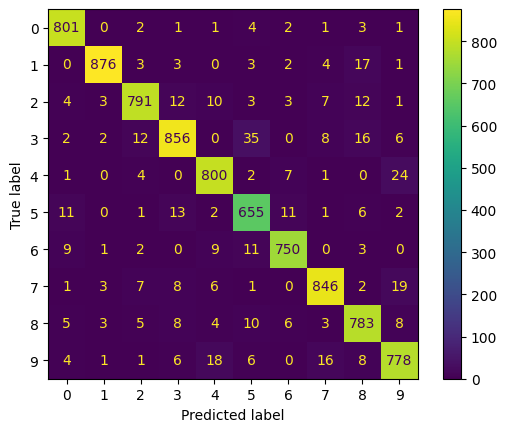

In [136]:
prediction = model.predict(x_val_pca)
prediction = np.argmax(prediction, axis=1)
y_val = np.argmax(y_val.values, axis=1)
confusion_matrix = confusion_matrix(y_val, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=range(10))
disp.plot()
plt.show()

### Fine Tuning the Parameters

In [165]:
# 1. Number of Hidden layers
layers = [1,2,3,4,5]
for layer in layers:
    print(f"Layers: {layer}, Accuracy: {fine_tuning(hidden_layers=layer)}")


Layers: 1, Accuracy: 0.9604166746139526
Layers: 2, Accuracy: 0.9638392925262451
Layers: 3, Accuracy: 0.9593750238418579
Layers: 4, Accuracy: 0.9592261910438538
Layers: 5, Accuracy: 0.9638392925262451


In [166]:
# number of hidden units in the hidden layer
units = [16,32,64,128,256]
for unit in units:
    print(f"Units: {unit}, Accuracy: {fine_tuning(hidden_layers=2, hidden_units=unit)}")

Units: 16, Accuracy: 0.9470238089561462
Units: 32, Accuracy: 0.9635416865348816
Units: 64, Accuracy: 0.9675595164299011
Units: 128, Accuracy: 0.9672619104385376
Units: 256, Accuracy: 0.975595235824585


In [168]:
# batch size and epoch
batch_size = [16,32,64,128,256]
for batch in batch_size:
    print(f"Batch Size: {batch}, Accuracy: {fine_tuning(hidden_layers=2, batch_size=batch)}")

Batch Size: 16, Accuracy: 0.960565447807312
Batch Size: 32, Accuracy: 0.9629464149475098
Batch Size: 64, Accuracy: 0.9614583253860474
Batch Size: 128, Accuracy: 0.9602678418159485
Batch Size: 256, Accuracy: 0.9575892686843872


In [170]:
# epoch
epochs = [10,20,30,40,50]
for epoch in epochs:
    print(f"Epochs: {epoch}, Accuracy: {fine_tuning(hidden_layers=2,batch_size=64, epochs=epoch)}")

Epochs: 10, Accuracy: 0.9587797522544861
Epochs: 20, Accuracy: 0.9639880657196045
Epochs: 30, Accuracy: 0.9626488089561462
Epochs: 40, Accuracy: 0.960565447807312
Epochs: 50, Accuracy: 0.9607142806053162


In [171]:
fine_tuning(features=50, hidden_layers=1, hidden_units=64,batch_size=32, epochs=20)

0.9699404835700989

This perticular model gives us the accuracy of about $97\%$ which is pretty accurate for this model. We can tune is further but honestly I don't want to right now. Let's see.  

In [173]:
model

<Sequential name=sequential_26, built=True>

In [174]:
from re import sub
# reading the test data
test_data = pd.read_csv("test.csv")
test_data = test_data / 255
test_data_pca = pd.DataFrame(pca.transform(test_data))

predictions = model.predict(test_data_pca)
predictions = np.argmax(predictions, axis=1)

submission = pd.DataFrame({"ImageId": range(1, len(predictions)+1), "Label": predictions})
submission.to_csv("submission.csv", index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
